https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques.  
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.  <br>
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

QUESTION: <br>
predict (regression) sales price of each house <br>
target variable: sales price (salesprice variable) <br>
independant: house <br>
metric of evaluation of sales price: RMSE <br>

setting up and loading in data


In [312]:
import numpy as np                     # for numerical operations, arrays
import pandas as pd                   # for dataframes: load, clean, manipulate
from IPython.display import display   # for nicer table display in notebooks

# Visualisation
import matplotlib.pyplot as plt       # for base plotting
import seaborn as sns                # for nicer statistical plots built on matplotlib

# Modelling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder #adding all but will pick one later
from sklearn.pipeline import Pipeline #for model
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer  # for applying different transformations to different columns
from sklearn.pipeline import Pipeline # for creating ML pipelines
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Make plots a bit nicer
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load data
df = pd.read_csv("AmesHousing.csv")
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

 **Intial Data Exploration**.  
**Goal:** Understand size, columns, types, obvius issues (missing values).  
**Part 1:** Overview of Data.  

In [313]:
# 1. Preview the data
print("=== HEAD ===")
display(df.head())
print(df.columns.tolist())

# 2. Shape of data
print("\n=== SHAPE ===")
print(df.shape)

# 3. Info
print("\n=== INFO ===")
df.info()

# 4. Summary statistics
print("\n=== DESCRIBE (NUMERIC) ===")
display(df.describe())

print("\n=== MISSING VALUES ===")
missing = df.isna().sum().sort_values(ascending=False)
display(missing)

# 5. Identify numeric + categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n=== NUMERIC COLUMNS ===")
print(numeric_cols)

print("\n=== CATEGORICAL COLUMNS ===")
print(categorical_cols)




=== HEAD ===


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000



=== MISSING VALUES ===


Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Fireplace Qu    1422
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64


=== NUMERIC COLUMNS ===
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

=== CATEGORICAL COLUMNS ===
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin T

**Initial Data Exploration**      
**Part 2:** Dealing with Missing Values, Dulicate Values  
**Goal:** To understand which values are missing/duplicated and decide what method of dealing with this

In [314]:
# ============================
# 1. Missing Values Overview
# ============================

# Create dataframe with count and percentage of missing values per column
missing_before = pd.DataFrame({
    'missing_count': df.isna().sum(),                   # Count of NaNs per column
    'missing_pct': df.isna().mean() * 100               # Percentage of NaNs per column
})

# Keep only columns with at least one missing value
missing_before = missing_before[missing_before['missing_count'] > 0]

# Sort by highest percentage of missing values
missing_before = missing_before.sort_values('missing_pct', ascending=False)

display(missing_before)

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())


# ============================
# 2. Handle Missing Values
# ============================

# Step 1: Drop columns with extremely high missingness (>80%)
high_missing_cols = missing_before[missing_before['missing_pct'] > 80].index
print("\nDropping columns with >80% missingness:", list(high_missing_cols))

df = df.drop(columns=high_missing_cols)


# Step 2: Re-identify numeric and categorical columns after dropping
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Step 3: Impute numeric columns using median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


# Step 4: Impute categorical columns using mode (most common value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Step 5: Final check to ensure no missing values remain
print("\nTotal missing values after imputation:", df.isna().sum().sum())

# NOTE:
# Missing values have now been addressed.
# Any subsequent missing-value checks will return 0 unless the dataset is reloaded.

# ============================
# Preview the data post dropping and imputation
# ============================ 

# 1. Preview the data
print("=== HEAD ===")
display(df.head())

# 2. Shape of data
print("\n=== SHAPE ===")
print(df.shape)

print("\n=== NUMERIC COLUMNS ===")
print(numeric_cols)

print("\n=== CATEGORICAL COLUMNS ===")
print(categorical_cols)

,missing_count,missing_pct
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Fireplace Qu,1422,48.532423
Lot Frontage,490,16.723549
Garage Cond,159,5.426621
Garage Qual,159,5.426621
Garage Finish,159,5.426621
Garage Yr Blt,159,5.426621


Duplicate rows: 0

Dropping columns with >80% missingness: ['Pool QC', 'Misc Feature', 'Alley', 'Fence']

Total missing values after imputation: 0
=== HEAD ===


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900



=== SHAPE ===
(2930, 78)

=== NUMERIC COLUMNS ===
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

=== CATEGORICAL COLUMNS ===
['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Ty

**Part 2:** Univariate Analysis of Target Variables (Sales Price)


=== Summary Statistics ===
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.7435000757376466

=== Histogram ===


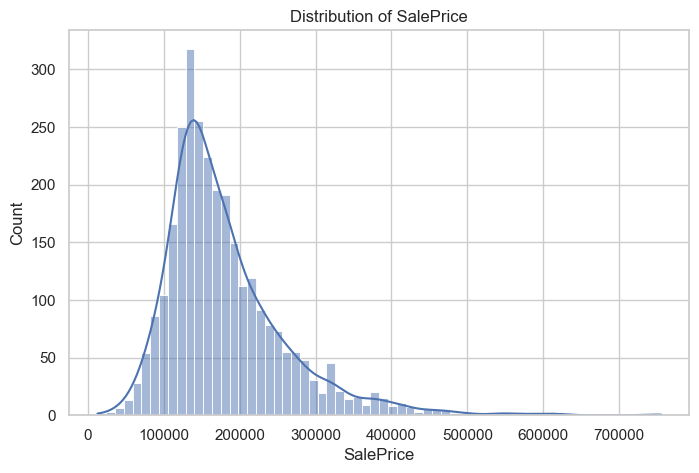


=== Histogram with Mean/median and Q-Q Plot ===


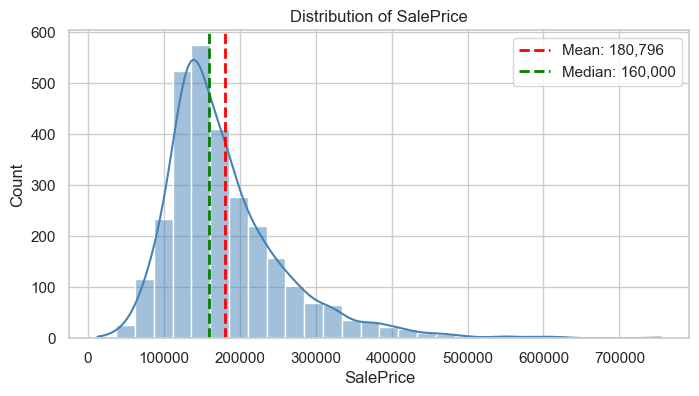


=== Boxplot for Outlier Detection ===


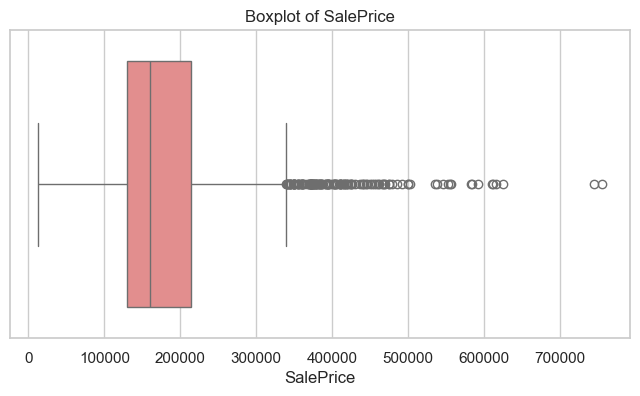

Q1: 129500.0
Q3: 213500.0
IQR: 84000.0
Lower bound: 3500.0
Upper bound: 339500.0
Number of outliers: 137
Highest SalePrice (overall): 755000
Highest SalePrice among outliers: 755000
Lowest SalePrice among outliers: 339750


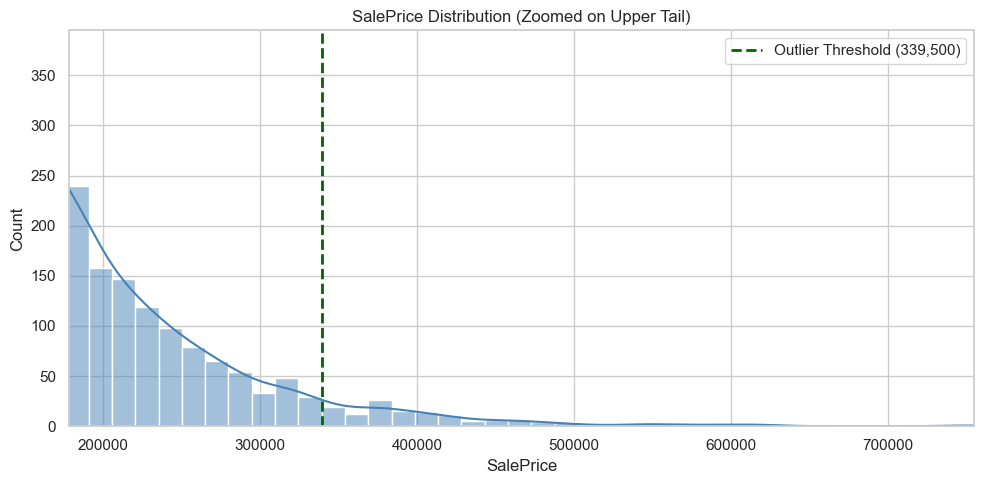

=== TARGET VALUE COUNTS ===
Pave    2918
Grvl      12
Name: Street, dtype: int64

=== TARGET PROPORTIONS ===
Pave    0.995904
Grvl    0.004096
Name: Street, dtype: float64


/var/folders/0w/cg0xyzt5583__mzw21n1jqgm0000gn/T/ipykernel_13947/3970227390.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="pastel")


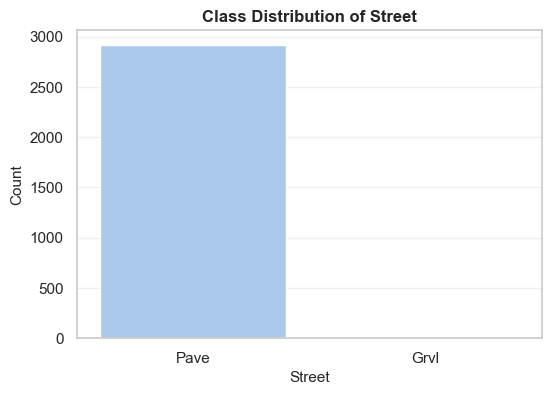

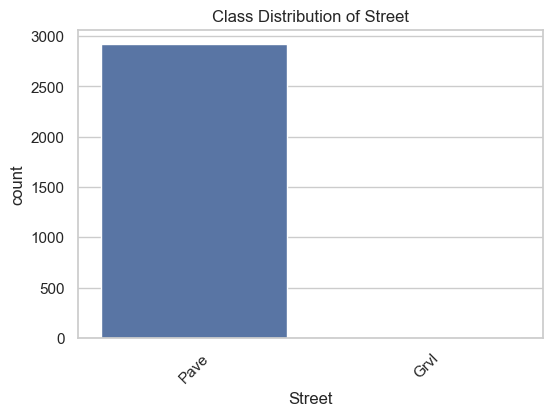

In [315]:
# ============================
# Target Variable Analysis - Summary Statistics
# ============================

print("\n=== Summary Statistics ===")
target_col = "SalePrice"
print(df[target_col].describe())

print("\nSkewness:", df[target_col].skew())

# ============================
# Histogram 
# ============================

print("\n=== Histogram ===")
plt.figure()
sns.histplot(df[target_col], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

# ============================
# Histogram with Mean/median and Q-Q Plot and Boxplot
# ============================
print("\n=== Histogram with Mean/median and Q-Q Plot ===")
plt.figure(figsize=(8, 4))
sns.histplot(df[target_col], kde=True, bins=30, color="steelblue")

# Calculate mean + median
mean_val = df[target_col].mean()
median_val = df[target_col].median()

# Overlay vertical lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:,.0f}")
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:,.0f}")

plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.legend()
plt.show()

#  Boxplot for outlier detection    
print("\n=== Boxplot for Outlier Detection ===")
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[target_col], color="lightcoral")
plt.title("Boxplot of SalePrice")
plt.xlabel("SalePrice")
plt.show()
# the box represents the interquartile range (IQR - width of box, q3 -q1),  with the line inside the box indicating the median/centre.
# The "whiskers" extend to 1.5 times the IQR from the quartiles. whisker 1; the points that extend 1.5*IQR below Q1 and whisker 2; the points that extend 1.5*IQR above Q3.
# Data points beyond the whiskers are considered outliers.
# so if we analyser what number of outliers we have and what is the threshold
# I used the IQR method to detect outliers.
# The boxplot shows the middle 50% of the data (from Q1 to Q3), and the whiskers extend to 1.5 times the IQR in each direction.
# Values beyond those whiskers are considered outliers because 
# they fall well outside the normal spread of the dataset and represent unusually extreme values.

# # ============================
# Further Analysis of Target Variable Outliers
# # ============================
# Identify outliers using IQR method
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df[df["SalePrice"] > upper_bound]
print("Number of outliers:", outliers.shape[0])

print("Highest SalePrice (overall):", df["SalePrice"].max())
print("Highest SalePrice among outliers:", outliers["SalePrice"].max())
print("Lowest SalePrice among outliers:", outliers["SalePrice"].min())


# Look at top few outliers
# ============================
# Zoomed-in Histogram of SalePrice (Highlighting Outlier Region)
# ============================

plt.figure(figsize=(10,5))
sns.histplot(df["SalePrice"], bins=50, kde=True, color="steelblue")

# Add vertical line for outlier cutoff
plt.axvline(upper_bound, color='darkgreen', linestyle='--', linewidth=2, 
            label=f'Outlier Threshold ({upper_bound:,.0f})')

# Zoom in (optional)
plt.xlim(df["SalePrice"].quantile(0.60), df["SalePrice"].max())

plt.title("SalePrice Distribution (Zoomed on Upper Tail)")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Using the IQR method, I identified 137 houses whose SalePrice values fall well above the normal range — specifically, above the threshold defined as Q3 + 1.5×IQR.
# Given the dataset contains 1460 observations, these outliers represent roughly 9.4% of the total.
# These properties correspond to genuinely high-value, luxury houses rather than errors, so I retain them but apply a log-transform to stabilise their influence on the model.”

# # Q-Q plot (normality check) - if needed then use
# plt.figure(figsize=(6, 6))
# stats.probplot(sale_scaled.values, dist="norm", plot=plt)
# plt.title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
# plt.grid(True, alpha=0.3)
# plt.show()

# # ============================
# # 2. Target Variable Analysis - Side by Side Plots (the guys code)
# # ============================

# print("\n===Histogram with Mean/median and Q-Q Plot Side by Side===")
# #  use SalePrice from your dataframe
# sale = df['SalePrice'].dropna()
# sale_scaled = sale / 100_000.0   # show prices in 100k units (optional)

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Histogram + mean/median lines
# axes[0].hist(sale_scaled, bins=50, alpha=0.75, color='steelblue', edgecolor='black')
# axes[0].axvline(sale_scaled.mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Mean: {sale_scaled.mean():.2f} ×$100k')
# axes[0].axvline(np.median(sale_scaled), color='green', linestyle='--', linewidth=2,
#                 label=f'Median: {np.median(sale_scaled):.2f} ×$100k')
# axes[0].set_xlabel('House Price (×$100k)', fontweight='bold', fontsize=11)
# axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=11)
# axes[0].set_title('Target Variable Distribution', fontweight='bold', fontsize=12)
# axes[0].legend(fontsize=10)
# axes[0].grid(True, alpha=0.3)


# # Q-Q plot (normality check)
# from scipy import stats
# stats.probplot(sale_scaled.values, dist="norm", plot=axes[1])
# axes[1].set_title('Q-Q Plot (Normality Check)', fontweight='bold', fontsize=12)
# axes[1].grid(True, alpha=0.3)

# fig.suptitle('Figure 1: Target Variable Analysis', fontweight='bold', fontsize=14, y=0.98)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()



# ============================
# 3. Categorical Feature Analysis
# ============================
target_col = "Street"   # 0 = no churn, 1 = churn
print("=== TARGET VALUE COUNTS ===")
print(df[target_col].value_counts())

print("\n=== TARGET PROPORTIONS ===")
print(df[target_col].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette="pastel")
plt.title(f"Class Distribution of {target_col}", fontsize=12, fontweight='bold')
plt.xlabel(target_col, fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.show()
# if target has more than one class
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title(f"Class Distribution of {target_col}")
plt.xticks(rotation=45)
plt.show()



Bivariate EDA - relationship with target. gives early indication of patterns and relationships, helps guide intuitiin for hte actual model.  
**for numeric target:**.  
numeric with numeric.  
correlation plot - shows which numerical features move together with the target. If something has a strong positive or negative correlation, it’s a good early sign that it may help predict the outcome. also helps avoidmulticollinearity (so can get rid of multiple variables that are highly correlated with each other), guides model selection.  do correlation plot and see which most highly correlated with.
scatterplots -Scatterplots show whether bigger values lead to higher or lower target values, and whether the relationship is linear or curved.” do scatterplots for highest correlated
numeric with categorical.  
Boxplots show whether one group tends to have higher or lower numeric values than the other. It reveals differences in medians, spread, and

***Categorical target***.  
look at unique values i have for each categoricl - name
stacked or grouped barcharts: These charts show, for each category, what percentage falls into each target group. This makes it easy to spot groups that behave differently. intuitive, good for presenting.  



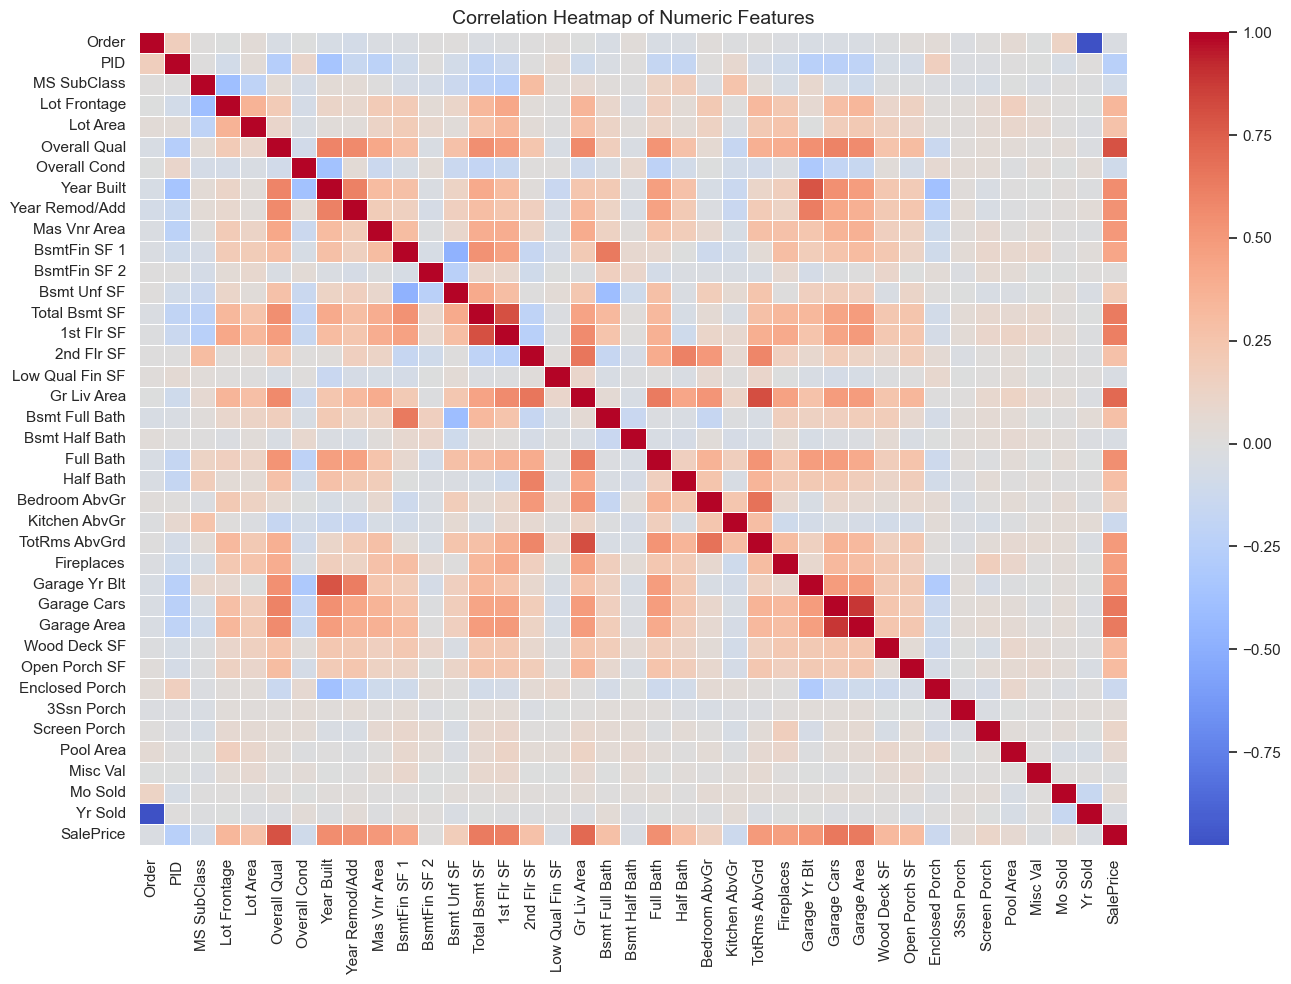

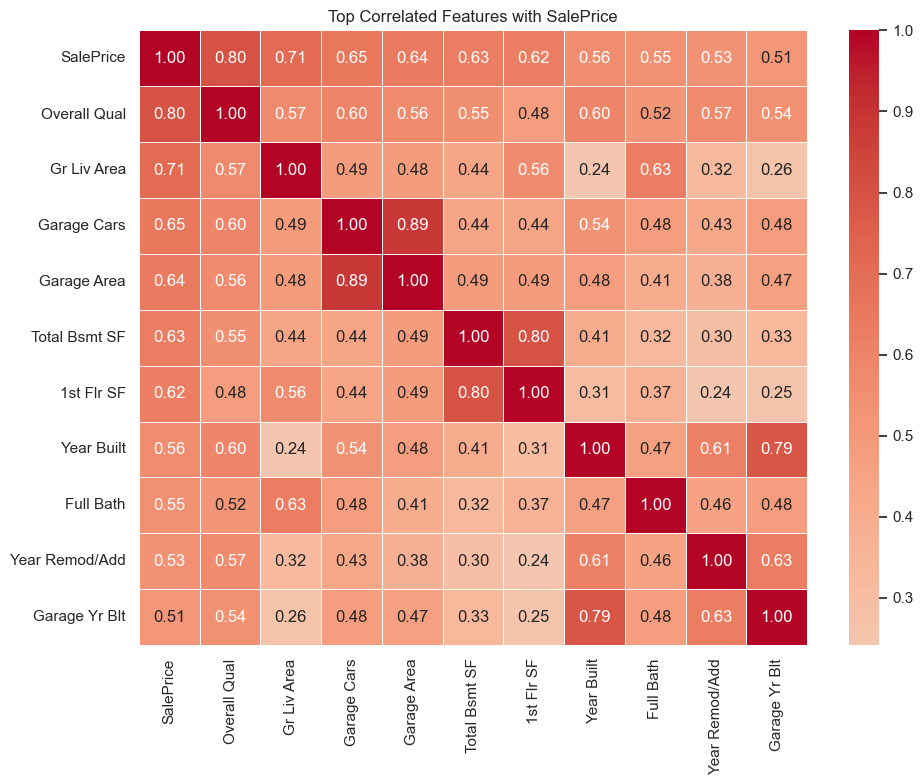

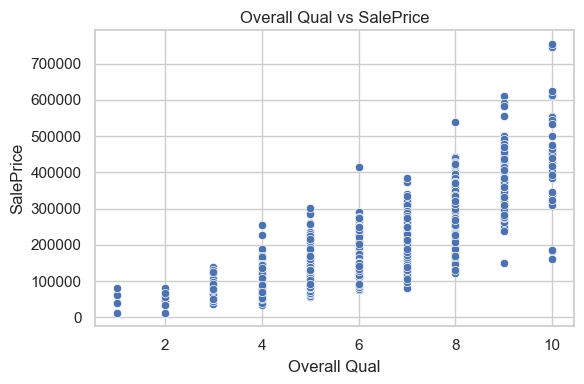

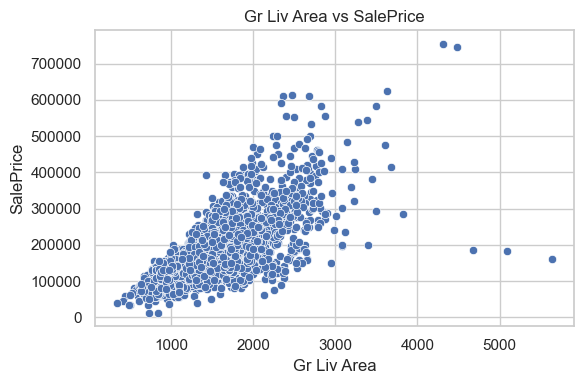

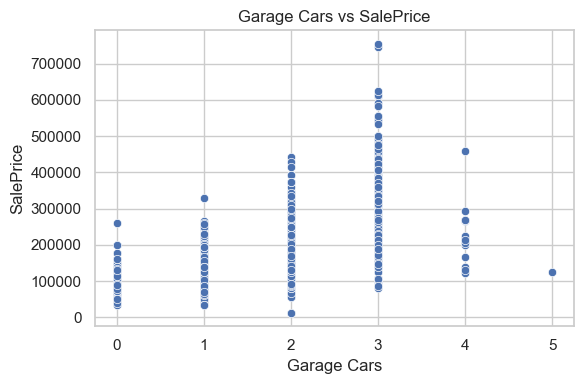

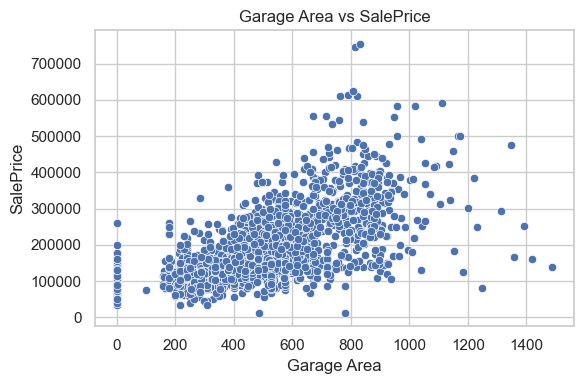


Value counts for Overall Qual :

Unique values in Overall Qual :
[ 6  5  7  8  9  4  3  2 10  1]


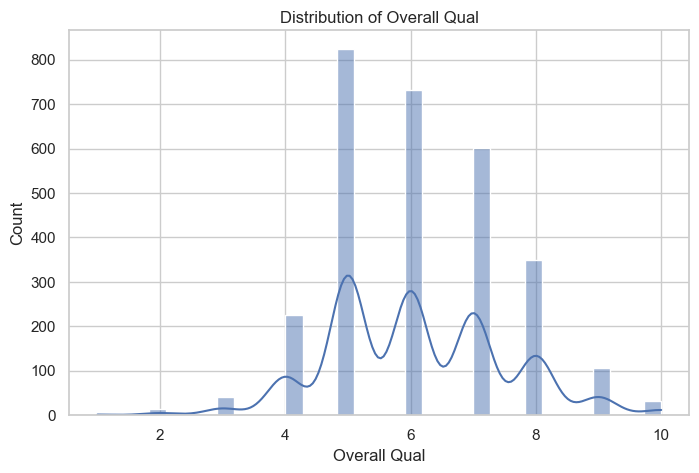

Overall Qual (non-outliers):
count    2793.000000
mean        5.963838
std         1.300120
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

Overall Qual (outliers):
count    137.000000
mean       8.766423
std        0.797632
min        6.000000
25%        8.000000
50%        9.000000
75%        9.000000
max       10.000000
Name: Overall Qual, dtype: float64


is_outlier,False,True,diff
SalePrice,169115.500179,418926.014599,249810.514420
Overall Qual,5.963838,8.766423,2.802585
Gr Liv Area,1454.944504,2411.919708,956.975204
Garage Cars,1.711779,2.890511,1.178732
Garage Area,456.140351,812.912409,356.772058


is_outlier,False,True,diff
SalePrice,"169,116","418,926","249,811"
Overall Qual,6,9,3
Gr Liv Area,"1,455","2,412",957
Garage Cars,2,3,1
Garage Area,456,813,357


is_outlier,False,True,diff
SalePrice,1.691155e+05,4.189260e+05,2.498105e+05
Lot Area,9.856794e+03,1.608311e+04,6.226316e+03
Gr Liv Area,1.454945e+03,2.411920e+03,9.569752e+02
Total Bsmt SF,1.013892e+03,1.820204e+03,8.063121e+02
1st Flr SF,1.125636e+03,1.851124e+03,7.254886e+02
BsmtFin SF 1,4.122929e+02,1.060569e+03,6.482765e+02
Garage Area,4.561404e+02,8.129124e+02,3.567721e+02
Mas Vnr Area,8.564017e+01,4.162117e+02,3.305715e+02
2nd Flr SF,3.246076e+02,5.566204e+02,2.320128e+02
Bsmt Unf SF,5.515772e+02,7.152628e+02,1.636856e+02


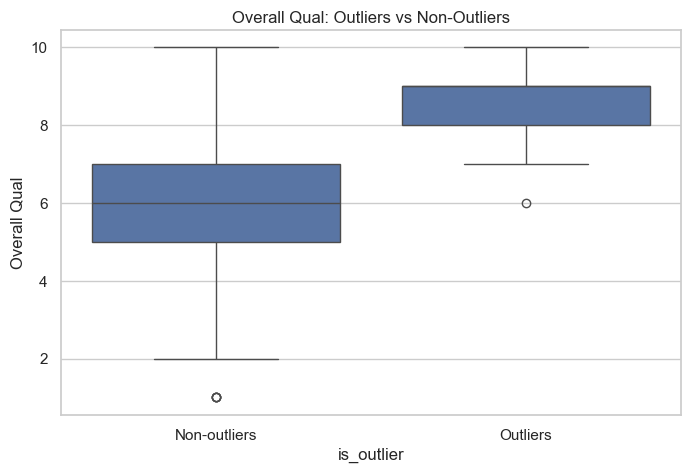

In [316]:
## ======================================================
# NUMERIC TARGET vs NUMERIC FEATURES
# Exploring linear/non-linear relationships
# ======================================================

target_num = "SalePrice"

# # --- Correlation with numeric target ---
# corr_with_target = df[numeric_cols].corr()[target_num].sort_values(ascending=False)
# print("Correlation of numeric features with target:\n")
# display(corr_with_target)

# ======================================================
# CORRELATION HEATMAP (ALL NUMERIC FEATURES INCLUDING TARGET)
# Identifying linear relationships + multicollinearity
# ======================================================

plt.figure(figsize=(14,10))

# Compute correlations
corr_matrix = df[numeric_cols].corr()

# Draw heatmap
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,      # set True if you want correlation values
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# ======================================================
# FOCUSED HEATMAP: TOP 10 FEATURES MOST CORRELATED WITH TARGET
# ======================================================

target_num = "SalePrice"

# Sort numeric features by correlation with target (absolute)
top_features = (
    corr_with_target.abs()
    .sort_values(ascending=False)
    .head(11)   # target + 10 top features
    .index
)

plt.figure(figsize=(10,8))
sns.heatmap(
    df[top_features].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title(f"Top Correlated Features with {target_num}")
plt.tight_layout()
plt.show()

# ======================================================
# SCATTERPLOTS: NUMERIC TARGET vs SELECTED NUMERIC FEATURES
# ======================================================

selected_numeric = corr_with_target.head(5).index.tolist()  # top 5 correlated features

for col in selected_numeric:
    if col != target_num:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target_num])
        plt.title(f"{col} vs {target_num}")
        plt.xlabel(col)
        plt.ylabel(target_num)
        plt.tight_layout()
        plt.show()

# ============================
# To understand certain columns 
# ============================
col = "Overall Qual"  # Example categorical column
print("\nValue counts for", col, ":")
df[col].value_counts()
print("\nUnique values in", col, ":")   
print(df[col].unique())
sns.histplot(df[col], kde=True)
plt.title(f"Distribution of {col}")
plt.show()

# ============================
# to look at outliers in the target variable
# ============================  
non_outliers = df[df["SalePrice"] <= upper_bound]

print("Overall Qual (non-outliers):")
print(non_outliers["Overall Qual"].describe())

print("\nOverall Qual (outliers):")
print(outliers["Overall Qual"].describe())

df["is_outlier"] = df["SalePrice"] > upper_bound

# compare outliers vs non-outliers on selected features
selected_cols = ["SalePrice", "Overall Qual", "Gr Liv Area", "Garage Cars", "Garage Area"]
summary = df.groupby("is_outlier")[selected_cols].mean().T

# Add a difference column: Outliers - Non-outliers
summary["diff"] = summary[True] - summary[False]
display(summary)

# or vs all variables - to be able to to say which variables are most different for outliers vs non-outliers
# Get all numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Compute outlier vs non-outlier means
summary_all = df.groupby("is_outlier")[numeric_cols].mean().T

# Add difference column
summary_all["diff"] = summary_all[True] - summary_all[False]

# Sort by biggest difference
summary_all_sorted = summary_all.sort_values("diff", ascending=False)
summary_formatted = summary.applymap(lambda x: f"{x:,.0f}")
display(summary_formatted)
display(summary_all_sorted)


sns.boxplot(x=df["is_outlier"], y=df["Overall Qual"])
plt.xticks([0,1], ["Non-outliers", "Outliers"])
plt.title("Overall Qual: Outliers vs Non-Outliers")
plt.show()



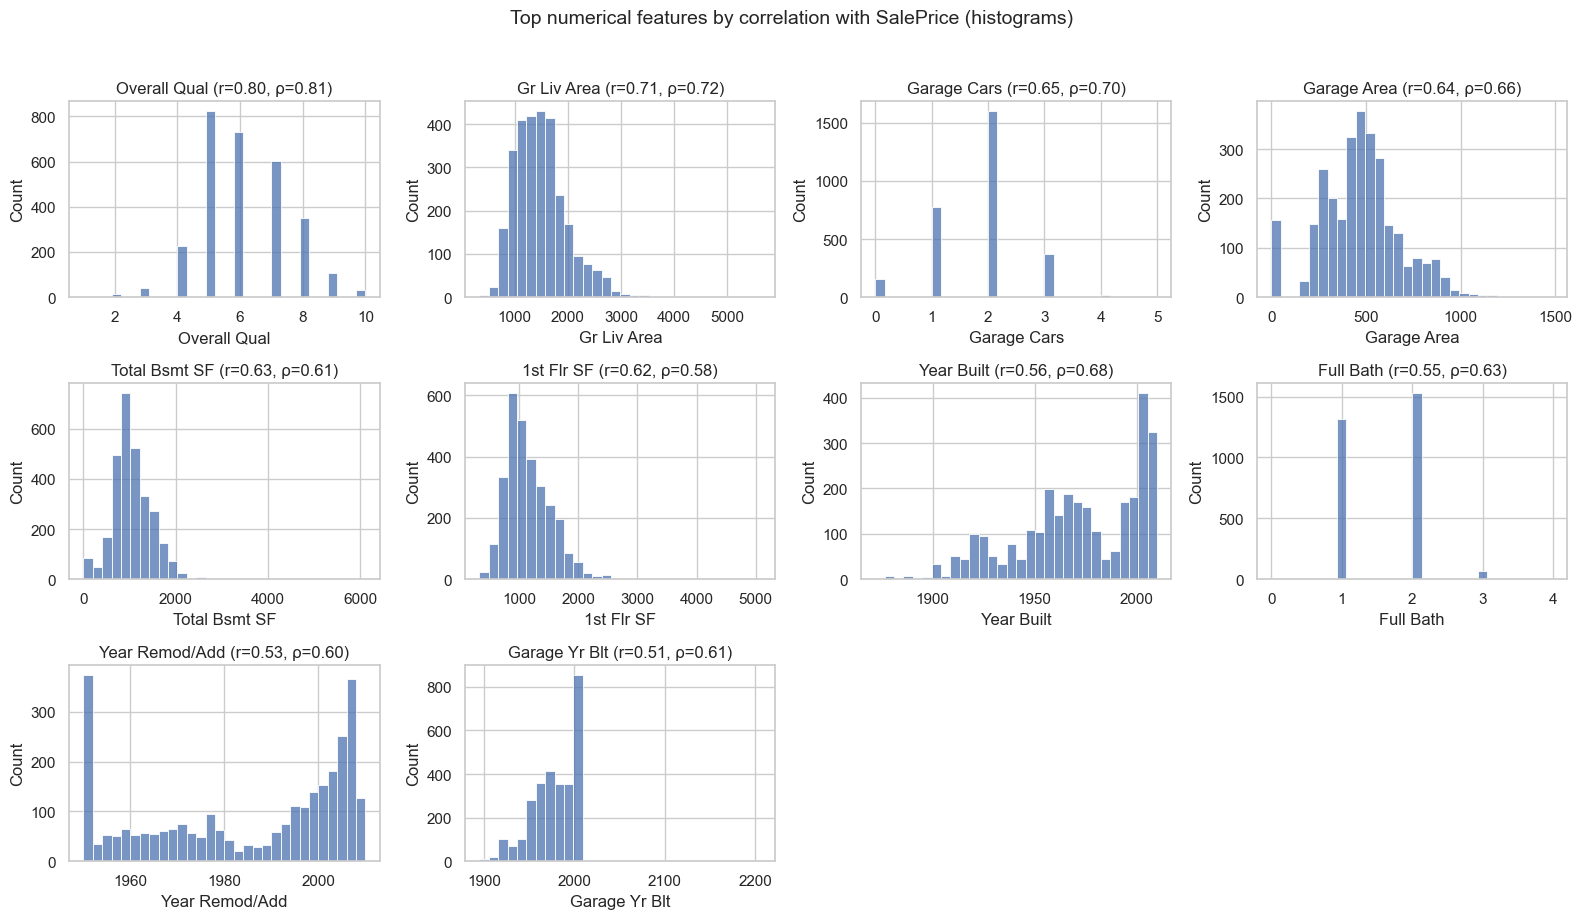

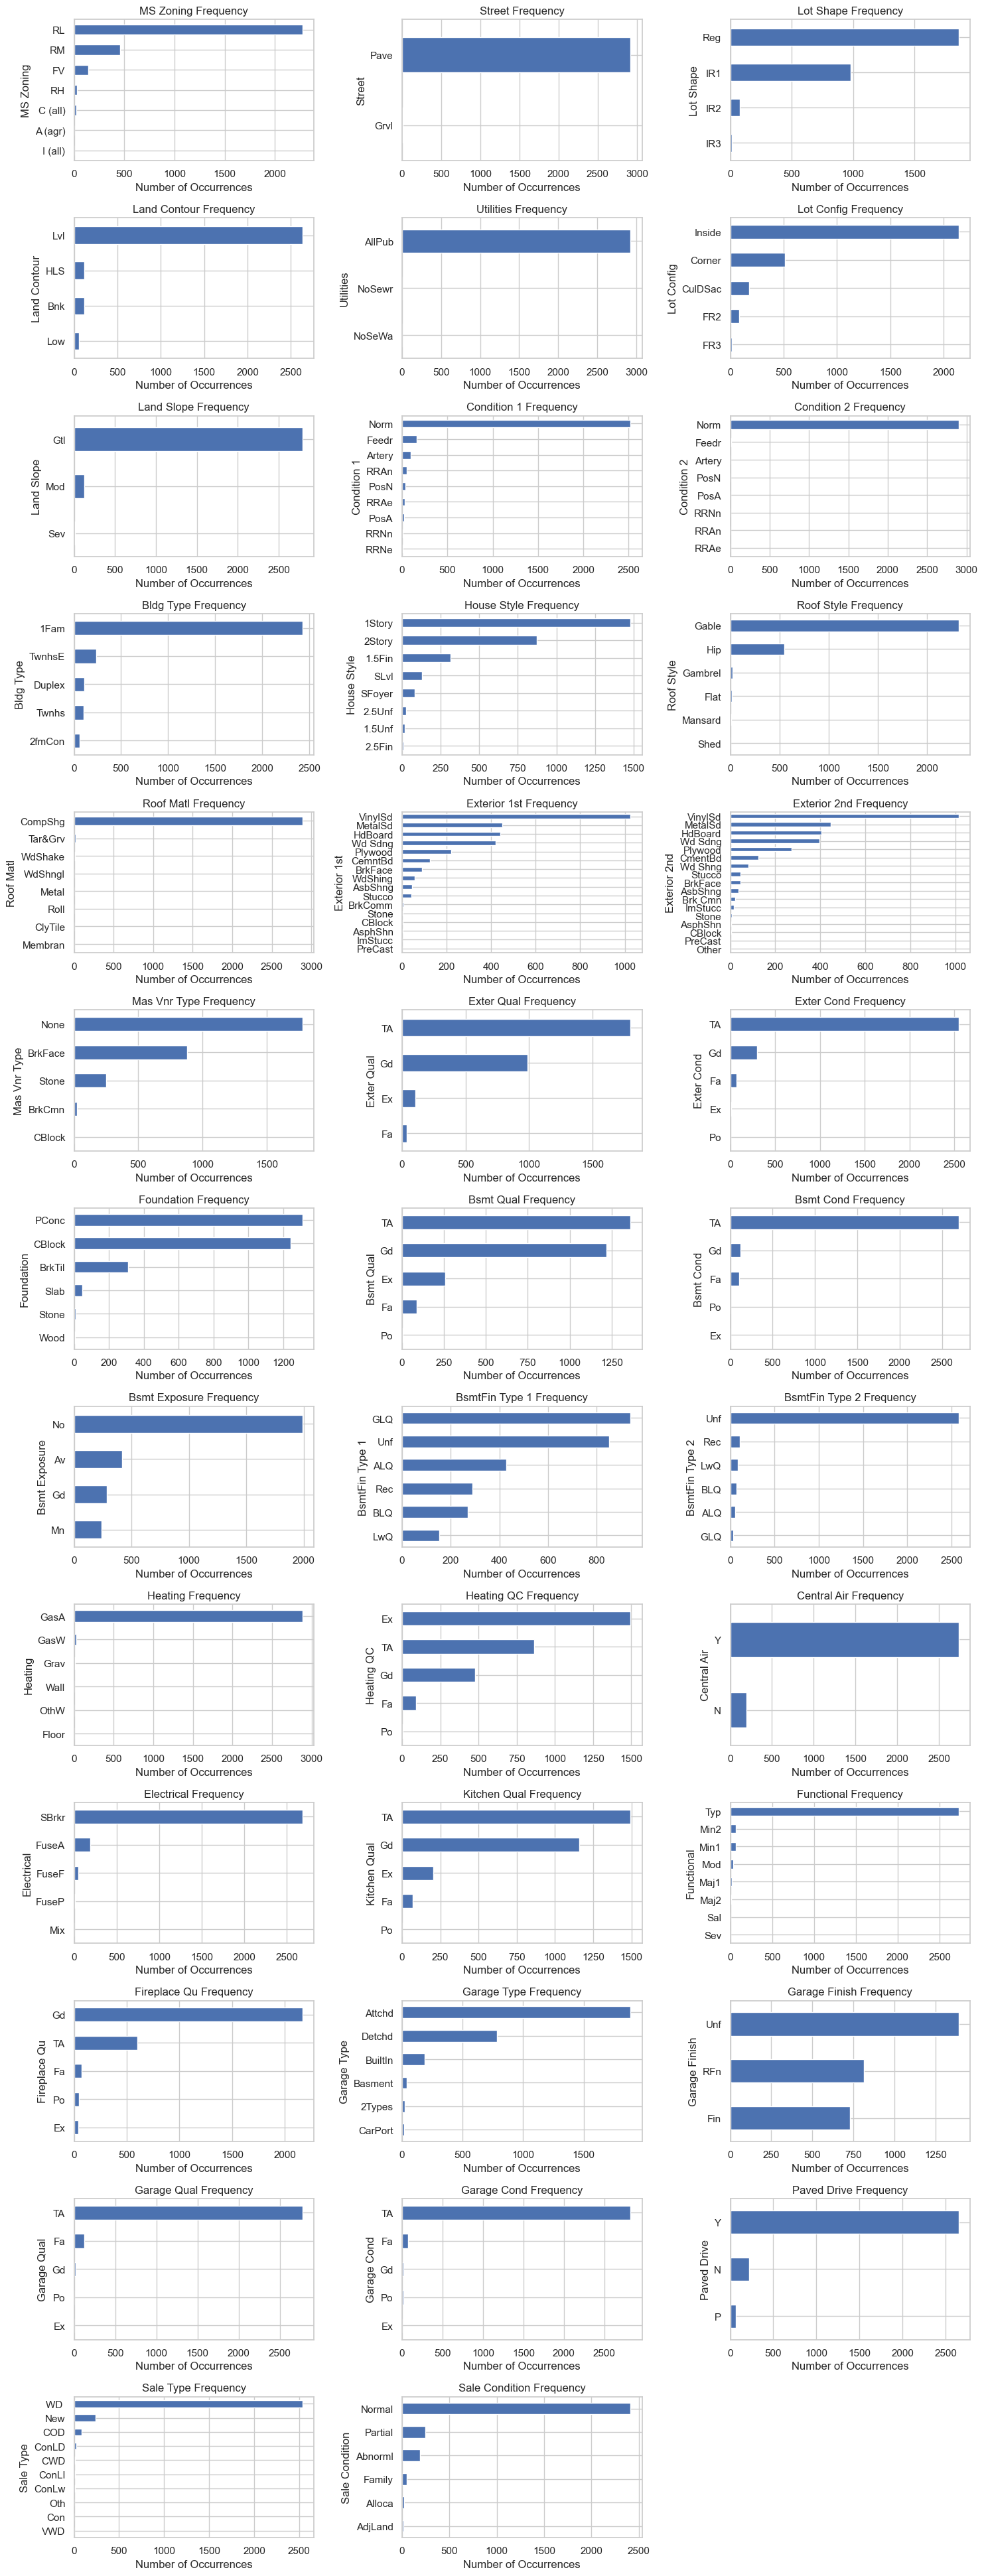

In [317]:
#GENERAL EXPLORATORY ANALYSIS FOR TARGET VARIABLES with NUMERIC AND CATEGORICAL FEATURES
# gives histograms and boxplots for numeric features
# gives countplots for categorical features
# a. numeric cols (excluding binary 0/2 target variable as it is categorical) 
# for col in numeric_cols:
#     fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#     # Histogram
#     sns.histplot(df[col], bins=30, ax=axes[0])
#     axes[0].set_title(f"Histogram of {col}")

#     # Boxplot
#     sns.boxplot(x=df[col], ax=axes[1])
#     axes[1].set_title(f"Boxplot of {col}")

#     plt.tight_layout()
#     plt.show()
    
#     #shows distribution of numerical features, identifies outliers, skewness etc
# #b. identify categorical columns
# for col in categorical_cols:
#     plt.figure()
#     sns.countplot(x=col, data=df)
#     plt.xticks(rotation=45)
#     plt.title(f"Count of each category in {col}")
#     plt.tight_layout()
#     plt.show()

# ------------
# TOP NUMERIC FEATURES BY CORRELATION WITH NUERIC TARGET (HISTOGRAMS)
# ------------
# the below: 
# selects numeric features
# calcaulates correlatioins with target using pearson and spearman-helps identify linear and monotonic relationships
# picks the top k features (can change number of ones oyu want) based on absolute pearson correlation
# plots histograms for these top k features with correlation stats in titles
# These histograms tell you which numerical features matter for prediction and whether their distributions need transformations.

target = "SalePrice"

# Numeric columns (excluding target)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)

# Compute Pearson (r) and Spearman (ρ) correlations with target
corr_stats = []
for col in numeric_cols:
    r = df[col].corr(df[target], method="pearson")
    rho = df[col].corr(df[target], method="spearman")
    corr_stats.append((col, r, rho))

corr_df = pd.DataFrame(corr_stats, columns=["feature", "pearson", "spearman"])
corr_df["abs_pearson"] = corr_df["pearson"].abs()

# Pick top k features
top_k = 10
top_feats = corr_df.sort_values("abs_pearson", ascending=False).head(top_k)

# Grid of histograms
n_cols = 4
n_rows = int(np.ceil(top_k / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

for ax, (_, row) in zip(axes, top_feats.iterrows()):
    col = row["feature"]
    sns.histplot(df[col], bins=30, ax=ax)
    ax.set_title(f"{col} (r={row['pearson']:.2f}, ρ={row['spearman']:.2f})")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Hide any unused subplots
for ax in axes[len(top_feats):]:
    ax.set_visible(False)

fig.suptitle("Top numerical features by correlation with SalePrice (histograms)",
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

#  ------------
# TOP Categorical FEATURES BY CORRELATION WITH NUERIC TARGET (barplots)
# ------------

# Categorical columns
# identifies categorical columns
# optionally filter out very high-cardinality ones- ones with too many unique values, which can clutter plots
# plot barplots for these categorical features to see their distributions
# to take from these: dominant categories, rare categories, potential grouping needed etc
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Optionally filter out very high-cardinality ones
categorical_cols = [c for c in categorical_cols if df[c].nunique() <= 20]

n_cat = len(categorical_cols)
n_cols = 3
n_rows = int(np.ceil(n_cat / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    counts = df[col].value_counts().sort_values(ascending=True)
    counts.plot(kind="barh", ax=ax)
    ax.set_title(f"{col} Frequency")
    ax.set_xlabel("Number of Occurrences")
    ax.set_ylabel(col)

# Hide unused axes
for ax in axes[len(categorical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


data pre-processing before modelling
1. split into train-test dataset - why?
2. encode features (label encoding is 0,1,2 depending), onehot ()
3. scaling 

In [ ]:
# THIS IS ALTOGETHER - I HAVE SPLIT WORK OUT BELOW. IGNORE THIS.
# 
# =========================================
# # 1. Define X and y, drop ID columns
# # =========================================
# target = "SalePrice"
# extra_cols = ["Id", "PID", "Order"]
# # HERE - DROP THE COLMNS NOT NEEDED ABOVE. AS DEFINED BY EDA.
# X = df.drop(columns=[c for c in [target] + extra_cols if c in df.columns]) 
# #this is dropping columns that i dont need - drops the target AND all the extra_cols i dont need (defined by eda)
# y = df[target]

# # =========================================
# # 2. Train–test split - DEFINE test-train dataset split
# # =========================================
# # the arugements define how big the test data should be - 0.2 means 20% test 
# # defining random state means it will always split data in the same way everytime run
# # if not define the random state, will get different data in the test,
# #  this is done for consistency of results - all of same values in each set always
# # if measuring performance of two diff models, need to make sure using the same split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Optional: log-transform target (good for SalePrice)
# # log transformed as the data was skewed
# # min-max would be for non-skewed data. 
# y_train_log = np.log1p(y_train)
# y_test_log = np.log1p(y_test)

# # =========================================
# # 3. Identify numeric & categorical columns of new training dataset
# # =========================================
# numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
# categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# # here, i am defining numerical/categorical cols from the dataframe X, sepcifically its training dataset x_train, 
# # X contains non-dropped columns only 
# # =========================================
# # 4. Preprocessing: scale numerics + one-hot encode categoricals
# #    (this is the standard setup for linear models)
# # =========================================
# # used standard 
# numeric_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_cols),
#         ("cat", categorical_transformer, categorical_cols),
#     ]
# )

# # the first part above defines what transform/scaling method to use - assigns variables to it
# # does actual transofmation after

# # =============
# # SIMPLE MODEL: SIMPLE LINEAR (REGRESSION) OR LOGISTIC (CLASSIFICATION)
# # ====================


# # =========================================
# # 5. Full pipeline: preprocessing + regression model
# # =========================================
# ridge_reg = Ridge(alpha=1.0)

# pipe = Pipeline(steps=[
#     ("preprocess", preprocessor),
#     ("model", ridge_reg),
# ])

# # Train
# pipe.fit(X_train, y_train_log)

# # Predict + evaluate
# y_pred_log = pipe.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
# print(f"Test RMSE (log SalePrice): {rmse:.4f}")

# # Back-transform predictions to original scale
# y_pred = np.expm1(y_pred_log)


Test RMSE (log SalePrice): 0.1191


NUMERICAL
pre process - train-test split 


In [318]:
from sklearn.model_selection import train_test_split

target = "SalePrice"
id_cols = ["Id", "PID", "Order"]

# X and y remain DATAFRAMES/SERIES
X = df.drop(columns=[c for c in [target] + id_cols if c in df.columns])
y = df[target]

X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(type(X_train_df))   # MUST BE: pandas.core.frame.DataFrame


<class 'pandas.core.frame.DataFrame'>


pre process - log transform - optional, only for numerical

In [319]:
# log transofmring the y variables, but can also log transform ones that need it from EDA. 
# you transform first and then scale
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


pre process - identify numerical and catergorical and fix skew

In [320]:
numeric_cols = X_train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train_df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

# maybe log transform here?
# FIX SKEW FIRST AND THEN SCALE - FOR ALL NUMERICS
# log transofmr when:  The variable is continuous, The variable is right-skewed
# The range is very wide (e.g., 1 → 10,000), Values must be positive (log cannot handle negative numbers)


Numeric: ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
Categorical: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen

pre-process - scaling and encoding

In [328]:

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# NUMERIC preprocessing
X_train_num = scaler.fit_transform(X_train_df[numeric_cols])
X_test_num  = scaler.transform(X_test_df[numeric_cols])

# CATEGORICAL preprocessing
X_train_cat = ohe.fit_transform(X_train_df[categorical_cols])
X_test_cat  = ohe.transform(X_test_df[categorical_cols])

# WAYS TO FIX SKEW:
#  log transofrm - best for posirive and  right skew, long right tail. 
# Fast, simple, safe, always improves linear models.
# code for it - define a column with col:
# df["col"] = np.log1p(df["col"])

#  square root transform - for milder skews
# cube root transofrm - works with negatives
# can use this for left skewed
# reciprocal transform - very aggresive, use rarely.
# box-cox transform - finds best way to auto transform

simple linear regression model

In [ ]:
# 1. fit model onto log target
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train_log)

# 2. predict log prices
y_pred_log = lin_reg.predict(X_test_prepared)
rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

# 3. turn predications into real data
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

# 4. evaluate actual units
rmse_real = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae_real = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print("RMSE (actual £):", rmse_real)
print("MAE (actual £):", mae_real)
print("R²:", r2)

# “After converting predictions back from log scale, the model achieves an RMSE of £x and MAE of £1x on unseen data. 
# This means the model’s predictions are typically within £x and xk of the true sale price, 
# explaining around 81% of the variance in house prices.”



RMSE (actual £): 162232.39140333087
MAE (actual £): 71102.70528303138
R²: -2.282717988997869


GENERIC STEPS FOR MODELLING CLASSIFICATION AND REGRESSION - TRAIN, PREDICT ON TEST, EVALUAYE

In [335]:
# steps are always
# fit model on logy: model.fit(X_train, y_train_log)
# predict logy: y_pred_log = model.predict(X_test)
# reverse trans: y_pred = np.expm1(y_pred_log)
# evaluate in real units: rmse = sqrt(MSE(y_test_actual, y_pred))

# OVERALLLLLLLL GENERIC CODE FOR TRAIING AND TESTING:
# TRAIN ON TRAINING DATA
# PREDICT ON TEST DATA
# EVALUATE PREICTIONS

# REGRESSION
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # 1. Train on traiing data
# model = LinearRegression()
# model.fit(X_train, y_train)

# # 2. Predict on test data
# y_pred = model.predict(X_test)

# # 3. Evaluate
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae  = mean_absolute_error(y_test, y_pred)
# r2   = r2_score(y_test, y_pred)

# print("RMSE:", rmse)
# print("MAE:", mae)
# print("R²:", r2)


# classification


# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # 1. Train
# clf = LogisticRegression(max_iter=1000)
# clf.fit(X_train, y_train)

# # 2. Predict
# y_pred = clf.predict(X_test)
# y_proba = clf.predict_proba(X_test)[:, 1]

# # 3. Evaluate
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1:", f1_score(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))


function to evaluate regression models

In [323]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression_model(name, model, 
                              X_train, y_train_log, 
                              X_test, y_test_log, y_test_original):
    """
    Fits model on log(target), evaluates on both log scale and original SalePrice scale.
    """
    # Train on log target
    model.fit(X_train, y_train_log)
    
    # Predict on log scale
    y_pred_log = model.predict(X_test)
    
    # Metrics on log scale
    rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
    
    # Back-transform to original target
    y_pred = np.expm1(y_pred_log)
    
    # Metrics on original scale
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    mae = mean_absolute_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)
    
    print(f"\n=== {name} ===")
    print(f"RMSE (log scale)       : {rmse_log:.4f}")
    print(f"RMSE (original scale)  : {rmse:,.0f}")
    print(f"MAE  (original scale)  : {mae:,.0f}")
    print(f"R²   (original scale)  : {r2:.3f}")
    
    return {
        "model": name,
        "rmse_log": rmse_log,
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    }


evaluating linear regression

In [333]:
lin_results = evaluate_regression_model(
    name="Linear Regression",
    model=LinearRegression(),          # ← this is your model
    X_train=X_train_prepared,
    y_train_log=y_train_log,
    X_test=X_test_prepared,
    y_test_log=y_test_log,
    y_test_original=y_test
)



=== Linear Regression ===
RMSE (log scale)       : 0.4667
RMSE (original scale)  : 162,232
MAE  (original scale)  : 71,103
R²   (original scale)  : -2.283


MORE COMPLEX REGRESSION MODELS

In [336]:
# RIDGE
ridge_results = evaluate_regression_model(
    "Ridge Regression",
    Ridge(alpha=1.0),
    X_train_prepared, y_train_log,
    X_test_prepared, y_test_log, y_test
)



=== Ridge Regression ===
RMSE (log scale)       : 0.4508
RMSE (original scale)  : 95,266
MAE  (original scale)  : 65,507
R²   (original scale)  : -0.132


CATEGORICAL - drop columns not needed

In [290]:


target = "Street"   # example categorical target
id_cols = ["Id", "CustomerID"]

X = df.drop(columns=[c for c in [target] + id_cols if c in df.columns])
y = df[target]


convrt column to numeric 0/1

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)   # Example: Yes→1, No→0

# one hot - 
# converts a categrical feature into multiple columns of 0s and 1s. 
# use it when category has no numerical, model is linear, model is logistic, distance based (knn)
# for big data, big issue as creates a new column for each category. 

# label - 
# assigns 1,2,3 integers to categorical
# use when feature is in natural order (poor, fair, good, excellent. high, medium, low)
# when model is tree based
# so giving 1,2,3.  but model places more weight on the higher number. creates bias for that category.


train test split

In [293]:
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(type(X_train_df))   # MUST be DataFrame


<class 'pandas.core.frame.DataFrame'>


udentify categroicals and numericals

In [294]:
numeric_cols = X_train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train_df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Categorical columns: ['MS Zoning', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'C

sclae numeric features

In [295]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_df[numeric_cols])
X_test_num  = scaler.transform(X_test_df[numeric_cols])


one-hot code catergoiucals

In [296]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat = ohe.fit_transform(X_train_df[categorical_cols])
X_test_cat  = ohe.transform(X_test_df[categorical_cols])


combined process numerical and cat

In [297]:
import numpy as np

X_train_prepared = np.hstack([X_train_num, X_train_cat])
X_test_prepared  = np.hstack([X_test_num, X_test_cat])


In [329]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=2000)
log_clf.fit(X_train_prepared, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


evluaions
Interpretation.  
Accuracy = overall correctness.  
Precision = how many predicted positives were correct.  
Recall = how many actual positives you detected.  
F1 = balance of precision & recall.  
ROC-AUC = best metric for class imbalance

In [300]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = log_clf.predict(X_test_prepared)
y_proba = log_clf.predict_proba(X_test_prepared)[:, 1]   # probability of class=1

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))


Accuracy : 0.9965870307167235
Precision: 0.9965870307167235
Recall   : 1.0
F1 Score : 0.9982905982905983
ROC-AUC  : 0.9991438356164384
